In [1]:
round(1.5)

2.0

In [2]:
round(2.5)

2.0

In [15]:
alist=[11,12,13]
for item = 0:10
    push!(alist, item^2)
end
print(alist)

[11, 12, 13, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [13]:
adict = Dict("name1"=>"python","name5"=>"julia","name3"=>"cedar")
for (keyword, value) in adict
    println("$(keyword) is $(value)")
end

name5 is julia
name3 is cedar
name1 is python


In [13]:
function rober!(du,u,p,t)
    y1,y2,y3 = u
    k1,k2,k3 = p
    du[1] = -k1*y1+k3*y2*y3
    du[2] = k1*y1-k2*y2^2-k3*y2*y3
    du[3] = k2*y2^2
    nothing
end



rober! (generic function with 1 method)

In [2]:
using DifferentialEquations

u0 = [1.0,0.0,0.0]
tspan = (0.0,1e5)
params = [0.04,3e7,1e4]

# ode_p = ODEProblem(rober!,u0,tspan,params)

3-element Vector{Float64}:
     0.04
     3.0e7
 10000.0

In [8]:
using ForwardDiff

function rober_jac_auto!(J,u,p,t)
    out = zero(u)
    ForwardDiff.jacobian!(J,(y,x)->rober!(y,x,p,t),out,u)
    nothing
end

rober_jac_auto! (generic function with 1 method)

In [4]:
ode_fun_ad_jac = ODEFunction(rober!, jac=rober_jac_auto!)
ode_prob_ad_jac = ODEProblem(ode_fun_ad_jac, u0, tspan, params)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100000.0)
u0: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

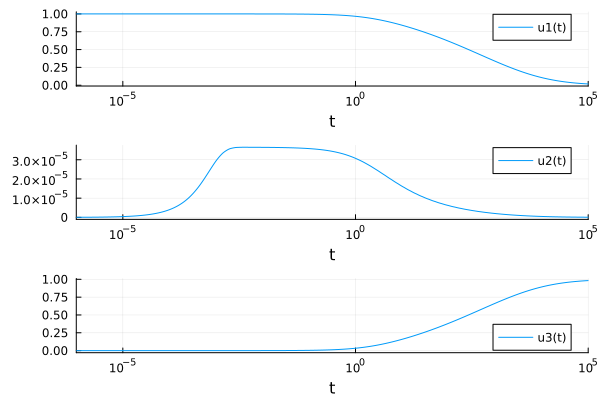

In [6]:
using Plots

ode_sol_ad_jac = solve(ode_prob_ad_jac, Rosenbrock23())
plot(ode_sol_ad_jac, tspan=(1e-6,1e5), xscale=:log10, layout=(3,1))

In [1]:
using StaticArrays
using DifferentialEquations
function rober_sa(u, p, t)
    y1,y2,y3 = u
    k1,k2,k3 = p
    dy1 = -k1*y1+k3*y2*y3
    dy2 = k1*y1-k2*y2^2-k3*y2*y3
    dy3 = k2*y2^2
    SA[dy1, dy2, dy3]
end

function rober_jac_auto_sa(u,p,t)
    ForwardDiff.jacobian(x -> rober_sa(u,p,t), u)
end



rober_jac_auto_sa (generic function with 1 method)

In [5]:
ode_fun_sa = ODEFunction(rober_sa, jac=rober_jac_auto_sa, jac_prototype=StaticArray)

tspan = (0.0,1e5)
params = [0.04,3e7,1e4]
u0=SA[1.0,0.0,0.0]
ode_prob_sa = ODEProblem(ode_fun_sa, u0, tspan, params)



ODEProblem with uType SVector{3, Float64} and tType Float64. In-place: false
timespan: (0.0, 100000.0)
u0: 3-element SVector{3, Float64} with indices SOneTo(3):
 1.0
 0.0
 0.0

In [9]:
using Plots

ode_sol_sa = solve(ode_prob_sa, Rosenbrock23())
plot(ode_sol_sa, tspan=(1e-6,1e5), xscale=:log10, layout=(3,1))

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase ~/.julia/packages/SciMLBase/K7a7T/src/integrator_interface.jl:515


In [10]:
using BenchmarkTools
@btime solve(ode_prob_sa, Rosenbrock23())
@btime solve(ode_sol_ad_jac, Rosenbrock23())

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase ~/.julia/packages/SciMLBase/K7a7T/src/integrator_interface.jl:515
┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase ~/.julia/packages/SciMLBase/K7a7T/src/integrator_interface.jl:515
┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consid

  9.215 s (102986704 allocations: 3.27 GiB)


LoadError: UndefVarError: ode_sol_ad_jac not defined

### Mass matrix

In [11]:
function rober_dae!(du,u,p,t)
    y1,y2,y3 = u
    k1,k2,k3 = p
    du[1] = -k1*y1+k3*y2*y3
    du[2] = k1*y1-k2*y2^2-k3*y2*y3
    du[3] = y1+y2+y3-1
    nothing
end

rober_dae! (generic function with 1 method)

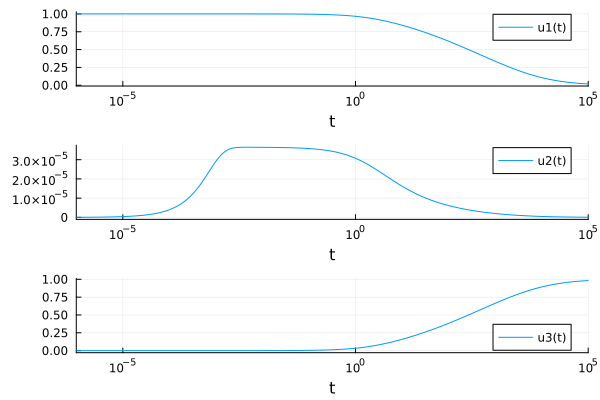

In [12]:
M=[1.0 0.0 0.0
   0.  1.0  0
   0.   0.   0]

u0 = [1.0,0,0]

ode_fun_mm = ODEFunction(rober_dae!, mass_matrix=M)
ode_prob_mm = ODEProblem(ode_fun_mm, u0, tspan, params)

ode_solve_mm = solve(ode_prob_mm, Rodas5(), reltol=1e-8, abstol=1e-8)
plot(ode_solve_mm, xscale=:log10, tspan=(1e-6,1e5),layout=(3,1))

### Residual form- Implicitly defined ODEs/DAEs

In [1]:
function rober_implicit_dae!(out,du,u,p,t)
    dy1,dy2,dy3 = du
    y1,y2,y3 = u
    k1,k2,k3 = p
    out[1] = -k1*y1+k3*y2*y3 - dy1
    out[2] = k1*y1-k2*y2^2-k3*y2*y3 - dy2
    out[3] = y1+y2+y3-1
    nothing
    
end


rober_implicit_dae! (generic function with 1 method)

In [2]:
du0 = [-0.04,0.04,0]

implicit_dae_problem = DAEProblem(rober_implicit_dae!, du0,u0,tspan,params,
    differential_vars=[true,true,false])

implicit_dae_sol = solve(implicit_dae_problem)
plot(implicit_dae_sol, xscale=:log10, tspan=(1e-6,1e5),layout=(3,1))

LoadError: UndefVarError: DAEProblem not defined

In [19]:
using DifferentialEquations
function lorenz_solver(x₀, ρ)
    
    function lorenz!(du,u,p,t)
        x,y,z = u
        σ,β,ρ = p
        du[1] =  σ*(y-x)
        du[2] =  x*(ρ-z)-y
        du[3] =  x*y-β*z
        nothing
    end

    u0 = [x₀,1.0,0.0]
    tspan = (0.0,1e5)
    params = [10.0,8/3,ρ]

    ode_prob = ODEProblem(lorenz!,u0,tspan,params)
    solve(ode_prob)
    #return the ODESolution
end

lorenz_solver (generic function with 1 method)

In [108]:
t = 0.0:0.1:100.0
sol1 = lorenz_solver(0.0,14.0)(t).u
x1 = getindex.(sol1, 1)
y1 = getindex.(sol1, 2)
z1 = getindex.(sol1, 3)
sol2 = lorenz_solver(1e-5,14.0)(t).u
x2 = getindex.(sol2, 1)
y2 = getindex.(sol2, 2)
z2 = getindex.(sol2, 3)

sol3 = lorenz_solver(0.0,28.0)(t).u
    x3 = getindex.(sol3, 1)
    y3 = getindex.(sol3, 2)
    z3 = getindex.(sol3, 3)
    sol4 = lorenz_solver(1e-5,28.0)(t).u
    x4 = getindex.(sol4, 1)
    y4 = getindex.(sol4, 2)
    z4 = getindex.(sol4, 3)

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase ~/.julia/packages/SciMLBase/K7a7T/src/integrator_interface.jl:515
┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase ~/.julia/packages/SciMLBase/K7a7T/src/integrator_interface.jl:515


1001-element Vector{Float64}:
  0.0
  0.06245336775015704
  0.7671782703967763
  7.586803554941537
 39.822922658906464
 41.624652503478515
 29.86622169276172
 26.246366245428455
 25.474728823444288
 26.601095282518706
 28.32501966379168
 28.669367618754652
 27.351777216348896
  ⋮
 11.690996180281346
 13.892367416941026
 28.87437782184372
 40.239072840178906
 31.23216991009624
 23.504379774256712
 18.191998219218046
 14.709602058257488
 14.324344070136771
 22.526410424200012
 37.553212726062135
 34.45967177183438

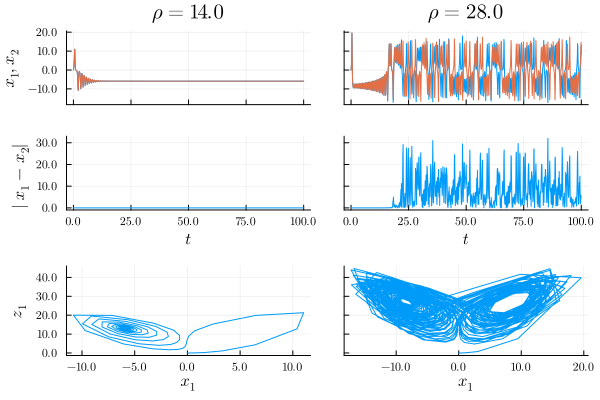

In [145]:
using LaTeXStrings
using Plots


# p1 = plot(t,[x1,x2],ylims=(-20.0,20.0), ylabel=L"$x_1,x_2$", title = L"$\rho=14.0$")
# p2 = plot(t, abs.(x1-x2), ylims=(0.0,30.0))
# p3 = plot(x1,z1, xlims=(-10.0,10.0), ylims=(0.0,40.0))

# plot(p1, p2, p3, layout = (3,1), legend=false, link=:y)

l = @layout[
    a{0.666h}
    b{0.333h}
]

theme(:default, xformatter= x -> L"%$x", yformatter= x -> L"%$x")
p1 = plot(layout = (2,2), legend=false, link=:both)

p1 = plot!(t,[x1,x2], ylabel=L"$x_1,x_2$", title = L"$\rho=14.0$", xformatter= _ -> "", subplot=1)
p1 = plot!(t, abs.(x1-x2), xlabel=L"$t$", ylabel=L"$| x_1 - x_2 |$", subplot=3)
p1 = plot!(t,[x3,x4], title = L"$\rho=28.0$",xformatter= _ -> "",yformatter= _ -> "",subplot=2)
p1 = plot!(t, abs.(x3-x4), xlabel=L"$t$",yformatter= _ -> "",subplot=4)

p2 = plot(layout = (1,2), legend=false, link=:y)
p2 = plot!(x1,z1,xlabel=L"$x_1$",ylabel=L"$z_1$", subplot=1)
p2 = plot!(x3,z3,xlabel=L"$x_1$",yformatter= _ -> "", subplot=2)

plot(p1, p2,layout = l)

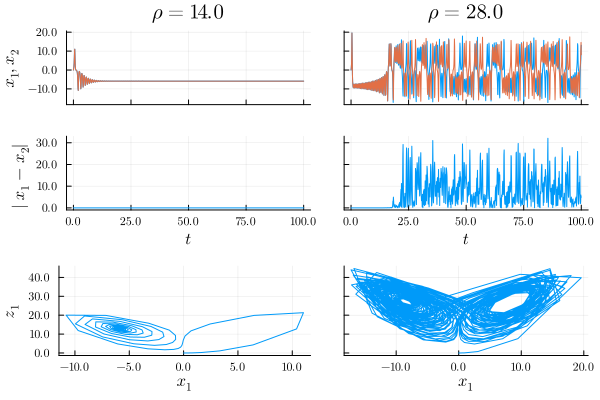

In [151]:
l = @layout[
    a{0.666h}
    b{0.333h}
]

theme(:default, xformatter= x -> L"%$x", yformatter= x -> L"%$x")



p1 = plot(t,[x1,x2], ylabel=L"x_1,x_2", title = L"\rho=14.0", xformatter= _ -> "")
p3 = plot(t, abs.(x1-x2), xlabel=L"t", ylabel=L"|x_1 - x_2|")
p5 = plot(x1,z1,xlabel=L"x_1",ylabel=L"z_1")

p2 = plot(t,[x3,x4], title = L"\rho=28.0",xformatter= _ -> "",yformatter= _ -> "")
p4 = plot(t, abs.(x3-x4), xlabel=L"t",yformatter= _ -> "")
p6 = plot(x3,z3,xlabel=L"x_1",yformatter= _ -> "")

p7 = plot(p1, p2, p3, p4, layout = (2,2), legend=false, link=:both)
p8 = plot(p5,p6, layout = (1,2), legend=false, link=:y)

plot(p7,p8,layout=l)